In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
import copy
from scipy.stats import shapiro, anderson


In [13]:
path="../data/labelled_transactions2.csv"

card_df = pd.read_csv(path)
card_df=card_df.loc[:, ~card_df.columns.str.contains('^Unnamed')]
card_df=card_df.loc[:, ~card_df.columns.str.contains('customer_id')]
card_df=card_df[card_df["Outlier_CBLOF"]==0]
card_df=card_df[card_df["Outlier_IF"]==0].fillna(0)
#card_df=card_df.loc[:, ~card_df.columns.str.contains('Outlier_CBLOF')]
#card_df=card_df.loc[:, ~card_df.columns.str.contains('Outlier_IF')]
myfeats=card_df.columns.to_list()
print(card_df[card_df.isna().any(axis=1)])

categorical_features = card_df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = card_df.select_dtypes(include=['int', 'float']).columns.tolist()


Empty DataFrame
Columns: [balance_account, purchases_amount, paid_advance, full_purchases, balance_frequency_update, installments, purchases_frequency, full_purchases_frequency, purchases_installments_frequency, cash_advance_frequency, nr_cash_advances, nr_purchases, credit_limit, fixed_rate_period, payments, min_payments, full_payment_prc, Outlier_CBLOF, Outlier_IF, KMeans_label, labels_hierarchical_3c, labels_hierarchical_9c, PowTrUMAT]
Index: []

[0 rows x 23 columns]


In [23]:
dummy = card_df.groupby('PowTrUMAT')['PowTrUMAT'].nunique()
dummy = card_df['PowTrUMAT'].value_counts()

print(dummy)

7    1482
4    1233
1    1226
5    1137
6     964
0     834
2     819
3     457
Name: PowTrUMAT, dtype: int64


In [132]:
#plt.rcParams["figure.figsize"] = (15, 15)
#plt.ylim(0, 300)
#plt.xlim(0, 10000)

selectors=["KMeans_label","labels_hierarchical_3c","labels_hierarchical_9c","PowTrUMAT"]
mysel=selectors[-1]
mysel=selectors[0]
highfeats=["purchases_amount","balance_account","installments","payments","fixed_rate_period","purchases_installments_frequency"]
#highfeats=["purchases_amount","installments"]

medians=np.zeros((len(highfeats),len(list(card_df[mysel].unique()))))
quartileProfitGains=np.zeros((len(highfeats),len(list(card_df[mysel].unique()))))
means=np.zeros((len(highfeats),len(list(card_df[mysel].unique()))))

for groupIND in range(len(card_df[mysel].unique())):
    group=card_df[mysel].unique()[groupIND]
    locdf=card_df[card_df[mysel]==group]
    for featInd in range(len(highfeats)):
        loclocSRS=locdf[highfeats[featInd]]
        meanmeddiffs[featInd][groupIND]=loclocSRS.median()-loclocSRS.mean()
        means[featInd][groupIND]=loclocSRS.mean()
        myquant=loclocSRS.quantile(0.75)
        quartileProfitGains[featInd][groupIND]=myquant-loclocSRS.loc[loclocSRS <= myquant].mean()
print(quartileProfitGains)

[[5.19688043e+02 3.32290424e+02 1.49443668e+03]
 [8.82480555e+02 2.75439592e+03 1.89856188e+03]
 [2.88693503e+02 3.74124566e+01 9.32325838e+02]
 [6.58656747e+02 1.61765896e+03 1.74819666e+03]
 [5.22856650e-01 6.43786127e-01 6.69412976e-02]
 [5.45351329e-01 8.10444991e-02 2.53687913e-01]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hello 0
[5.19688043e+02 8.82480555e+02 2.88693503e+02 6.58656747e+02
 5.22856650e-01 5.45351329e-01]
[519.6880427782891, 332.29042389210025, 1494.4366758241763]
hello 1
[5.19688043e+02 8.82480555e+02 2.88693503e+02 6.58656747e+02
 5.22856650e-01 5.45351329e-01]
[882.4805549523917, 2754.3959186507723, 1898.561879582417]
hello 2
[5.19688043e+02 8.82480555e+02 2.88693503e+02 6.58656747e+02
 5.22856650e-01 5.45351329e-01]
[288.6935027598896, 37.41245664739884, 932.3258379120874]
hello 3
[5.19688043e+02 8.82480555e+02 2.88693503e+02 6.58656747e+02
 5.22856650e-01 5.45351329e-01]
[658.6567470068987, 1617.6589565635823, 1748.1966563887347]
hello 4
[5.19688043e+02 8.82480555e+02 2.88693503e+02 6.58656747e+02
 5.22856650e-01 5.45351329e-01]
[0.5228566499913754, 0.6437861271676297, 0.06694129763130796]
hello 5
[5.19688043e+02 8.82480555e+02 2.88693503e+02 6.58656747e+02
 5.22856650e-01 5.45351329e-01]
[0.5453513289655174, 0.08104449905303031, 0.253687913491247]
[0.5453513289655174, 0.08104449905

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


hello 2
[3.32290424e+02 2.75439592e+03 3.74124566e+01 1.61765896e+03
 6.43786127e-01 8.10444991e-02]
[288.6935027598896, 37.41245664739884, 932.3258379120874]
hello 3
[3.32290424e+02 2.75439592e+03 3.74124566e+01 1.61765896e+03
 6.43786127e-01 8.10444991e-02]
[658.6567470068987, 1617.6589565635823, 1748.1966563887347]
hello 4
[3.32290424e+02 2.75439592e+03 3.74124566e+01 1.61765896e+03
 6.43786127e-01 8.10444991e-02]
[0.5228566499913754, 0.6437861271676297, 0.06694129763130796]
[0.5228566499913754, 0.6437861271676297, 0.06694129763130796]
hello 5
[3.32290424e+02 2.75439592e+03 3.74124566e+01 1.61765896e+03
 6.43786127e-01 8.10444991e-02]
[0.5453513289655174, 0.08104449905303031, 0.253687913491247]
hello 0
[1.49443668e+03 1.89856188e+03 9.32325838e+02 1.74819666e+03
 6.69412976e-02 2.53687913e-01]
[519.6880427782891, 332.29042389210025, 1494.4366758241763]
[519.6880427782891, 332.29042389210025, 1494.4366758241763]
hello 1
[1.49443668e+03 1.89856188e+03 9.32325838e+02 1.74819666e+03
 6.

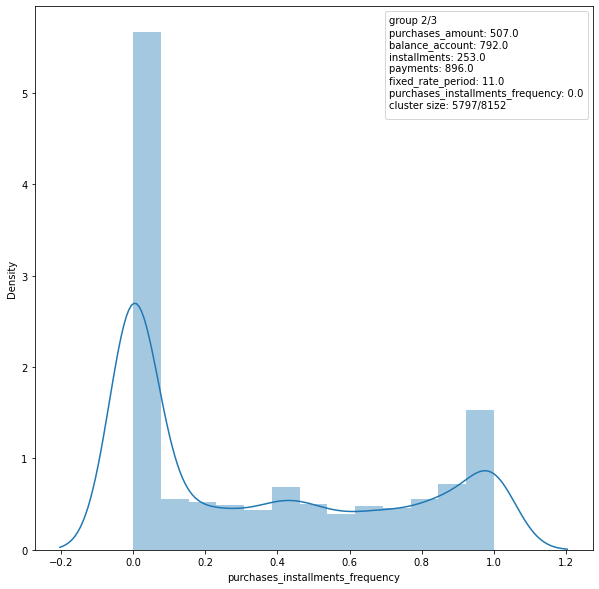

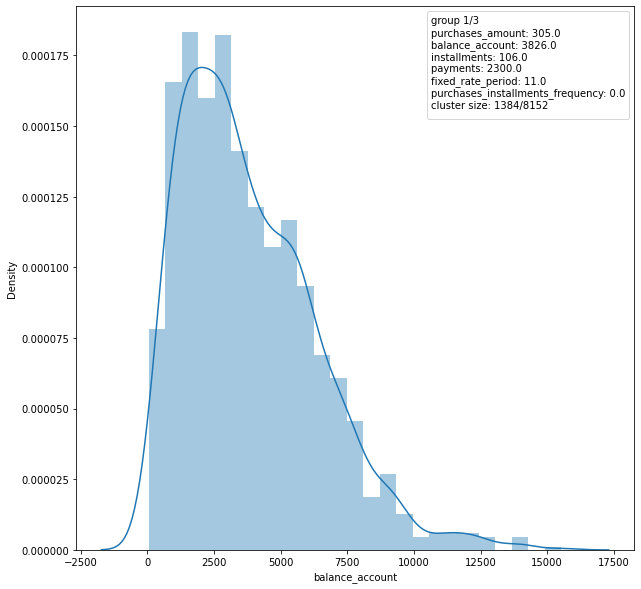

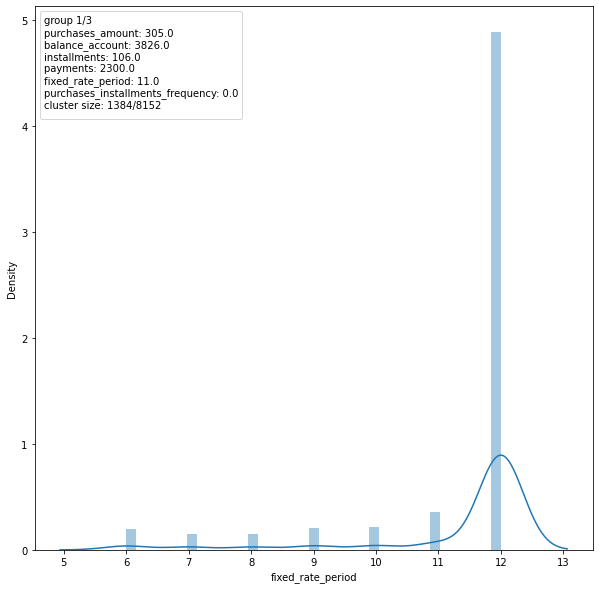

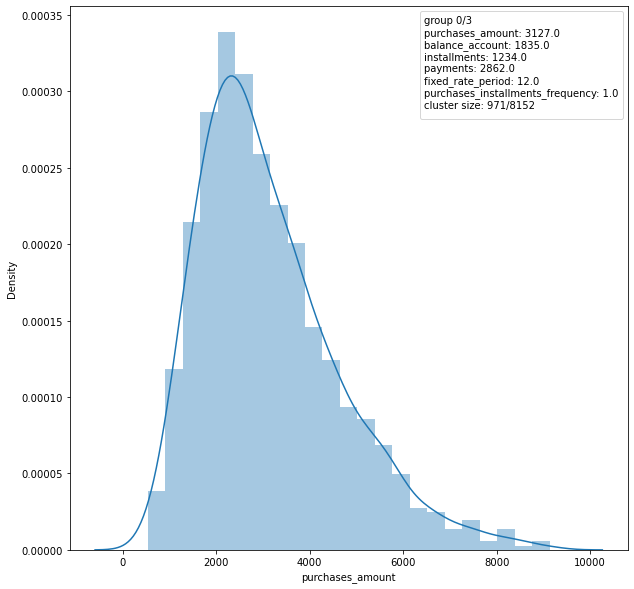

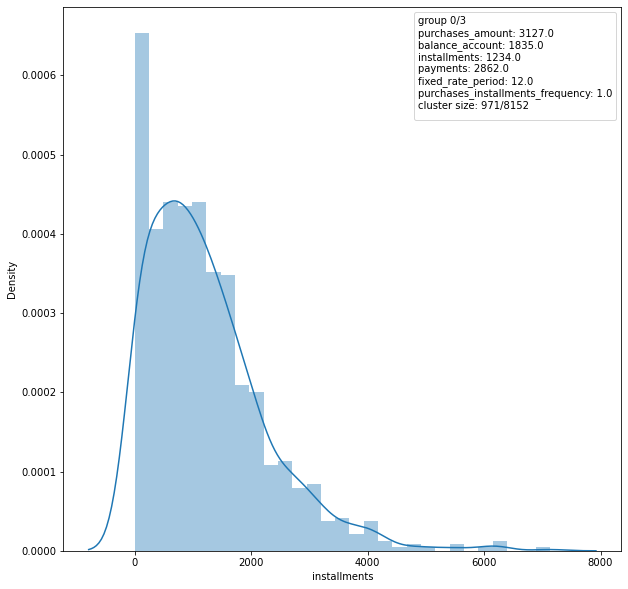

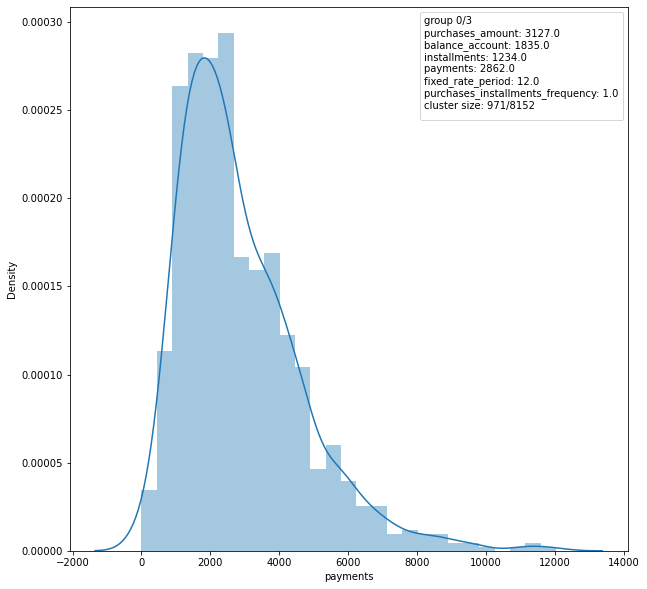

In [133]:
selfeat=1
plt.rcParams["figure.figsize"] = (10, 10)
#groupselectors=[5,6]
#
for groupIND in range(len(card_df[mysel].unique())):
    group=card_df[mysel].unique()[groupIND]
    locdf=card_df[card_df[mysel]==group]
    for featInd in range(len(highfeats)):
        locdata=card_df[card_df[mysel]==group]
        myfeat=highfeats[featInd]
        locquartProfGains=list(quartileProfitGains[featInd])
        mycompfeats=(quartileProfitGains.T)[groupIND]
        print("hello", featInd)
        print(mycompfeats)
        print(locquartProfGains)
        if mycompfeats[featInd]>=sorted(locquartProfGains)[-1]:
            print(locquartProfGains)
            fig, ax1 = plt.subplots()
            mystr="group "+str(group)+"/"+str(len(card_df[mysel].unique()))+"\n"
            for highfeatIND in range(len(highfeats)):
                mystr+=highfeats[highfeatIND]+": "+str(np.around(means[highfeatIND][groupIND]))+"\n"
            mystr+="cluster size: "+str(locdf.shape[0])+"/"+str(card_df.shape[0])
            #sns.histplot(data=locdf, x=myfeat, label=mystr, palette = "Set2", alpha=0.5,ax=ax1)
            #ax1.hist(data=locdf, x=myfeat, label=mystr)
            #a=sns.histplot(data=locdf, x=myfeat, label=mystr,ax=ax1)
            a=sns.distplot(locdf[[myfeat]],ax=ax1)
            ax1.legend(loc=0, title=mystr)
            ax1.set(xlabel=myfeat)
            #fig.legend(loc='upper right')
            fig.show()

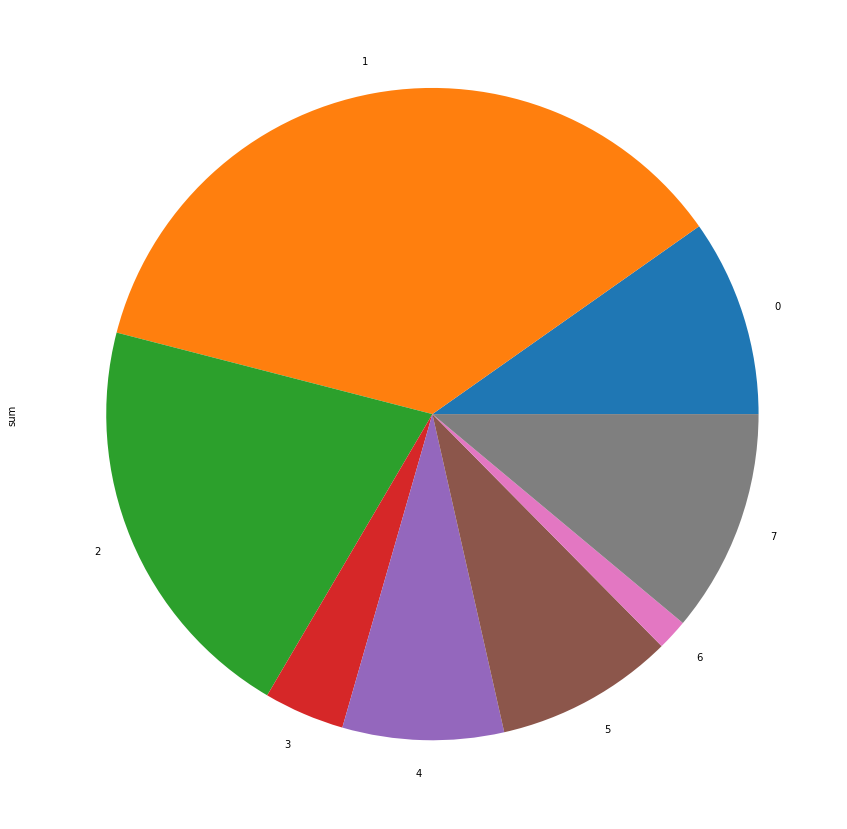

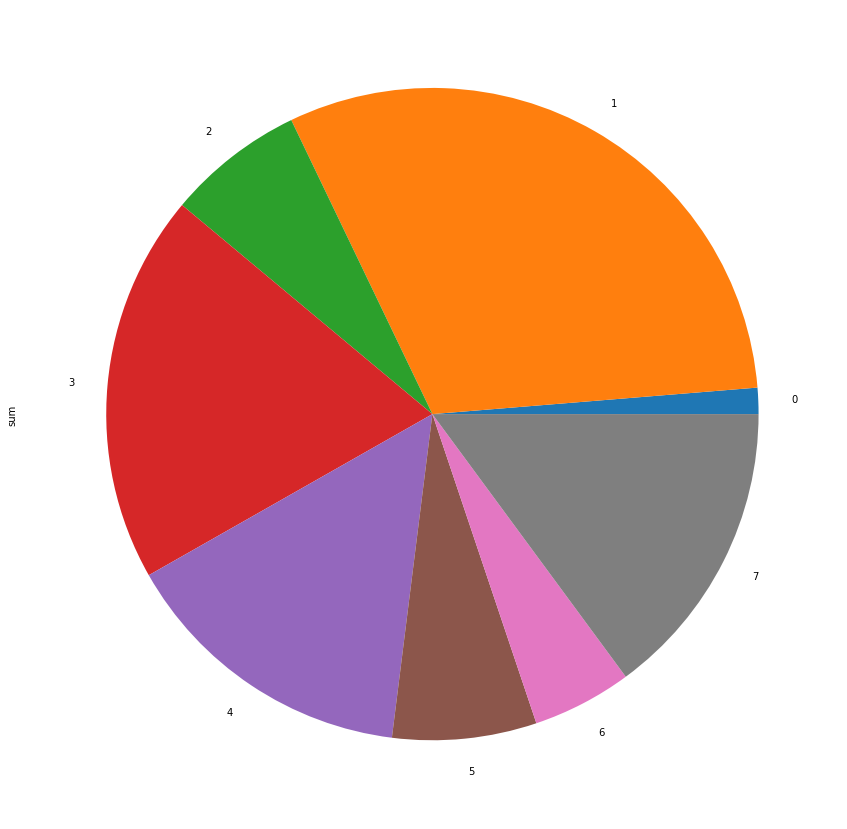

<AxesSubplot:ylabel='sum'>

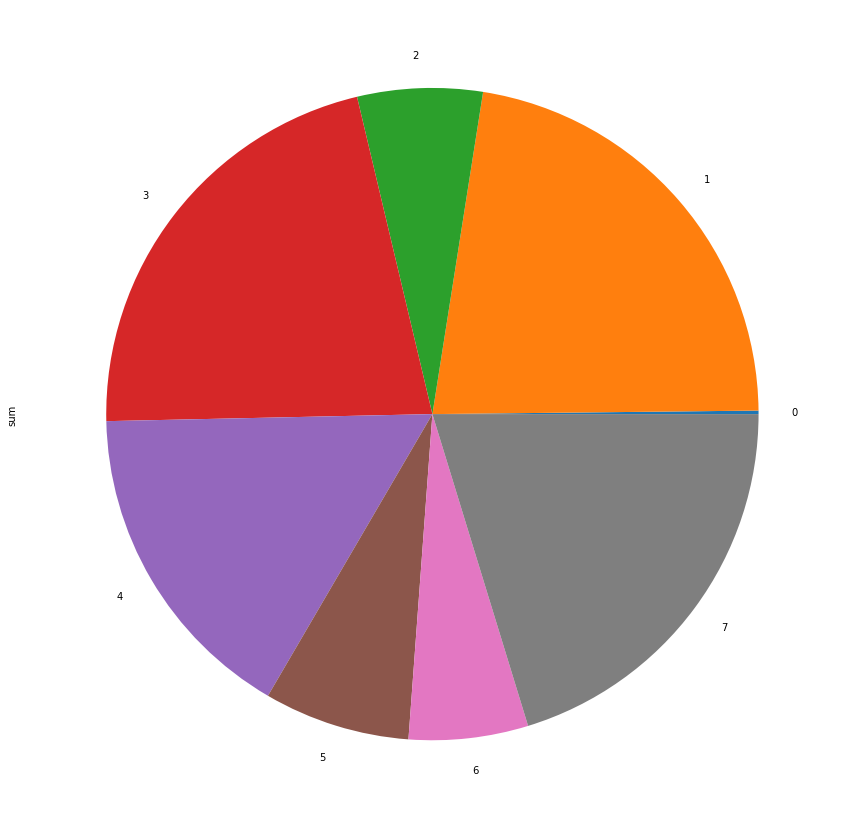

In [19]:
 w_df = card_df.groupby('PowTrUMAT').agg({'balance_frequency_update': 'count',
                                  'balance_account': ['sum', 'mean'], 
                                  'purchases_amount': ['sum', 'mean'],
                                  'installments': ['sum', 'mean'], 
                                  'payments': ['sum', 'mean'],
                                  'fixed_rate_period': ['mean'],
                                  'purchases_installments_frequency': ['mean']})

w_df["balance_account"]["sum"].plot(kind='pie')
plt.show()
w_df["purchases_amount"]["sum"].plot(kind='pie')
plt.show()
w_df["installments"]["sum"].plot(kind='pie')
